# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

(0, 5)

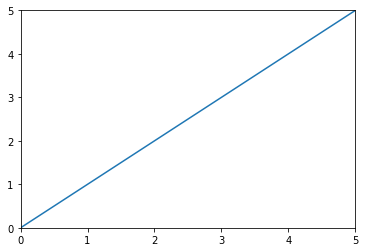

In [11]:
import matplotlib.pyplot as plt
import numpy as np


## passes vertical line tests
x = [0,1,2,3,4,5]
y = [0,1,2,3,4,5]

plt.plot(x,y)

plt.xlim(0,5)
plt.ylim(0,5)

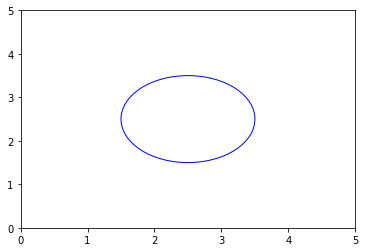

In [31]:
## does not pass vertical line test
circle2 = plt.Circle((2.5, 2.5), 1, color='b', fill=False)

ax = plt.gca()

ax.set_xlim((0, 5))
ax.set_ylim((0, 5))

ax.add_artist(circle2)


## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

For certain inputs(x) in the graph, there are more than one possible outputs(y), which makes it not a function.  The definition of a function is that for any given input(x) it can only be related to exactly one ouput(y).

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 1 != function  - for x = 1, y = 2 and 3

**Relation 2 == function - for every x there are different y's**

Relation 3 != function - for x=9, y = 4 and 6

relation 4 != function - for x=6, y =2 and 4

relation 5 != function - for x=2, y = 6, 7 and 4

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

for:
\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)
\end{align} 

the dimensionality for the domain(input) is 3, and for the codomain(range/output) is 2

for:
\begin{align}
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

the dimensionality for the domain(input) is 4, and for the codomain(range/output) is 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

yes:
\begin{align}
f(x_1,x_2) = (x_1, x_2, x_1^2+x_2^2)
\end{align}

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\\end{bmatrix}
\end{align}

\begin{align}
\\
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = x_1\begin{bmatrix} 1 \\ 0 \end{bmatrix} + x_2\begin{bmatrix} 0 \\ 1 \\\end{bmatrix}
\\
\end{align}

\begin{align}
\begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2\end{bmatrix} = \begin{bmatrix} y_1 \\ y_2 \end{bmatrix}
\end{align}



\begin{align}
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align}
\\
\begin{bmatrix} x_1 \\ x_2 \\x_3\end{bmatrix} = x_1\begin{bmatrix} 1 \\ 0 \\0\end{bmatrix} + x_2\begin{bmatrix} 0 \\ 1 \\0\end{bmatrix} + x_3\begin{bmatrix} 0\\0\\1\end{bmatrix}
\\
\end{align}

\begin{align}
\\
\begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3\\5 & 1 & -2 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \\ x_3\end{bmatrix} = \begin{bmatrix} y_1 \\ y_2 \\ y_3 \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
## making first function
def f(x, x_2):
  return (x + (3*x_2)), ((2*x_2)-x)


In [0]:
## making second function
def g(x, x_2, x_3):
  return ((4*x)+x_2+(2*x_3)), (-x+(2*x_2)+(3*x_3)), ((5*x)+x_2-(2*x_3))


In [41]:
## testing to see if first transformation matrix works.
A = [
    [1,3],
    [-1,2]
]

x = [1,2]

print(np.matmul(A,x))
print(f(1,2))

[7 3]
(7, 3)


In [43]:
## testing to see if second transformation matrix works
A = [
    [4,1,2],
    [-1,2,3],
    [5,1,-2]
]

x = [4,7,2]

print(np.matmul(A,x))
print(g(4,7,2))

[27 16 23]
(27, 16, 23)


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvectors - vectors that are do not change orientation when a certain transformation is made to a space.

Eigenvalue - Even though Eigenvectors do not change orientation, they can still be transformed or scaled. The Eigenvalue is the measure that the Eigenvector got scaled by.  the amount it either got 'stretched' or 'squished' by.


# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

There is so much data that it becomes exponentially hard to search or find relations within it. The data becomes sparse as well.  Once there are enough dimensional data, it becomes difficult to fill every single value for all the features.  

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

The rule of thumb is that you should have 5 times the number of observations for every parameter in your model

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [87]:
iris_df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
## PCA process:
## 1. separate data into x and y variables
x = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_df['species']

In [89]:
## 2. center each column at 0 by subtracting its mean
x.describe()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in features:
  x[i] = np.subtract(x[i], x[i].mean())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [90]:
## 3. divide each column by its standard deviation
for i in features:
  x[i] = np.divide(x[i],x[i].std())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [91]:
## let PCA do the rest

pca = PCA(2)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [0]:
principalComponents = pca.transform(x)

In [0]:
principalDF = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

In [99]:
DF = pd.concat([principalDF, y], axis=1)
DF.head()

,principal component 1,principal component 2,species
0,-2.256981,0.504015,setosa
1,-2.079459,-0.653216,setosa
2,-2.360044,-0.317414,setosa
3,-2.296504,-0.573447,setosa
4,-2.380802,0.672514,setosa


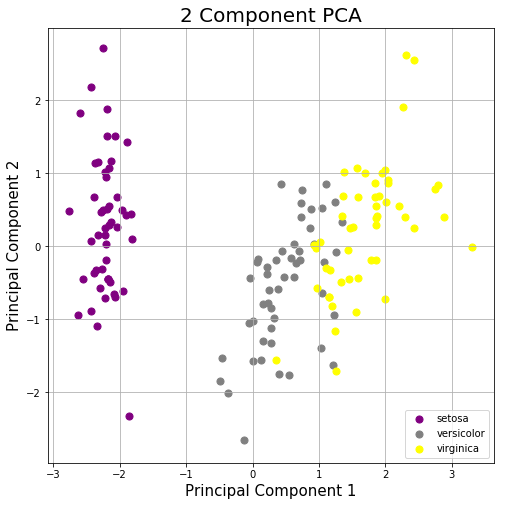

In [105]:
## visualize
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


species = ['setosa', 'versicolor', 'virginica']
colors = ['purple', 'grey', 'yellow']
for species, color in zip(species,colors):
    indicesToKeep = DF['species'] == species
    ax.scatter(DF.loc[indicesToKeep, 'principal component 1']
               , DF.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)